<a href="https://colab.research.google.com/github/CelestineKarimi/HYPOTHESIS-TESTING/blob/main/Q2_%3B_HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. **INTRODUCTION**

**OVERVIEW**

We have been hired by a Paris based car sharing service. The car sharing service has three services that is: Blue cars

Blue cars
Utilib cars
Utilib 14
The data recorded is to indicate the number of cars taken and the number of cars returned each day

Null hypothesis: There are more Blue cars that are taken on weekends than Utilib cars.

Alternate Hypothesis: There are less Blue cars taken on the weekends than Utilib cars

**OBJECTIVE**

The main objective is to find out how to optimize their car sharing service. The car sharing service might experience hiccups because of a shortage of cars in an area that has a lot of clients in need of the service or too many cars in an area without clients.

Therefore the main objective is:

- To find out how to optimize the car sharing service in the Area.

**DEFINE SUCCESS METRICS**

The project will be considered successful if the following activities and criteria can be met.

The data is successfully loaded and cleaned.

1. The data is successfully loaded and cleaned.
2. Perform univariate and bivariate data on the data.
3. Define the research question and Hypothesis.
4. Perform Hypothesis testing.

# **1. IMPORTING LIBRARIES AND LOADIND DATASETS**

In [ ]:
# import libraries

import pandas as pd

import numpy as np
import math as m

from scipy import stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset(s)
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.sample(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
9160,92410,5/23/2018,1174,2,weekday,10,12,1,1,0,0,0,0
11701,93360,2/24/2018,1396,5,weekend,2,1,0,0,0,1,0,0
3414,75116,6/2/2018,1440,5,weekend,12,11,0,0,1,1,3,3
2942,75019,5/29/2018,1439,1,weekday,492,468,9,8,49,51,134,127
5063,92130,3/19/2018,1440,0,weekday,243,234,7,5,13,14,5,5
4446,92000,3/25/2018,1380,6,weekend,135,147,2,5,10,11,0,0
13810,94140,3/9/2018,1440,4,weekday,33,34,2,2,7,5,0,0
10229,93110,4/20/2018,1417,4,weekday,40,33,1,2,2,3,0,0
5524,92160,3/12/2018,1440,0,weekday,31,31,1,0,1,1,0,0
8544,92370,5/30/2018,1440,2,weekday,34,32,1,1,1,0,0,0


In [ ]:
#loading description file
df1 = pd.read_excel('https://bit.ly/DSCoreAutolibDatasetGlossary')
df1

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# **2. DATA EXPLORATION**

In [ ]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
df.shape

(16085, 13)

In [ ]:
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

    

*   There are no null values



In [ ]:
df.duplicated().any()

False



*   There are no duplicate values



In [ ]:
len(df)

16085

There are 16085 rows

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


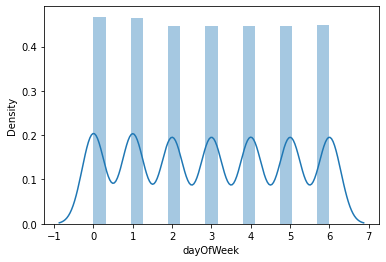

In [ ]:
# distribution plot for the day of the week
sns.distplot(df['dayOfWeek']);

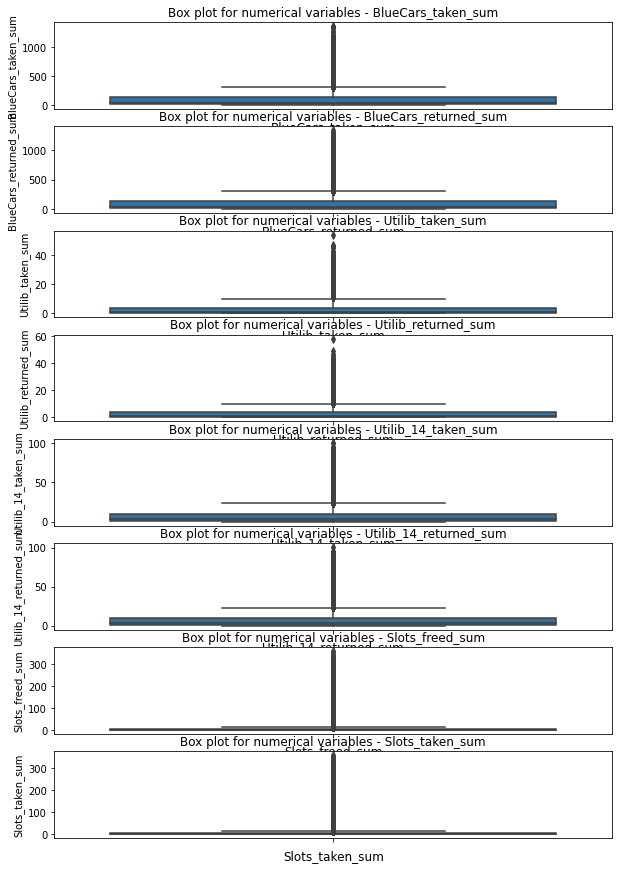

In [ ]:
# checking for anomalies.

numerical_columns = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(numerical_columns), figsize=(10,15))

for i, col_val in enumerate(numerical_columns):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [ ]:
#dealing with anomalies

# 1. find the interquatile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

#res_outliers = ((df.respondent_age < Q1 - 1.5 * IQR) | (df.respondent_age > Q3 + 1.5 * IQR))
#res_outliers.value_counts()

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


In [ ]:
df_r = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_r)

       Postal code       date  n_daily_data_points  dayOfWeek day_type  \
3899         91330   1/1/2018                 1440          0  weekday   
3900         91330   1/2/2018                 1438          1  weekday   
3901         91330   1/3/2018                 1439          2  weekday   
3903         91330   1/5/2018                 1440          4  weekday   
3905         91330   1/7/2018                 1440          6  weekend   
...            ...        ...                  ...        ...      ...   
16079        95880  6/14/2018                 1439          3  weekday   
16080        95880  6/15/2018                 1440          4  weekday   
16081        95880  6/16/2018                 1440          5  weekend   
16082        95880  6/17/2018                 1440          6  weekend   
16083        95880  6/18/2018                 1440          0  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
3899                   19                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
numerical_columns = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
categorical_columns = ["dayOfWeek", "day_type"]  
       
print(numerical_columns)

print("*************************************")

print(categorical_columns)

['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
*************************************
['dayOfWeek', 'day_type']


In [ ]:
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

# **3.EXPLORATORY DATA ANALYSIS**

***i)Univariate Analysis***

In [ ]:
# mean 
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mean()))



BlueCars_taken_sum: 125.92695057506994


BlueCars_returned_sum: 125.912713708424


Utilib_taken_sum: 3.69829033260802


Utilib_returned_sum: 3.6990985390115014


Utilib_14_taken_sum: 8.600559527510102


Utilib_14_returned_sum: 8.599191793596518


Slots_freed_sum: 22.62903326080199


Slots_taken_sum: 22.629281939695367


In [ ]:
# median
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].median()))



BlueCars_taken_sum: 46.0


BlueCars_returned_sum: 46.0


Utilib_taken_sum: 1.0


Utilib_returned_sum: 1.0


Utilib_14_taken_sum: 3.0


Utilib_14_returned_sum: 3.0


Slots_freed_sum: 0.0


Slots_taken_sum: 0.0


In [ ]:
# interquatile ranges 
for column in numerical_columns:
  print('\n')
  print(df[column].quantile([0.25, 0.5, 0.75]))



0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64


0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64


0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_taken_sum, dtype: float64


0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_returned_sum, dtype: float64


0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_taken_sum, dtype: float64


0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_taken_sum, dtype: float64


In [ ]:
# Standard deviation, Variance, Skewness and Kurtosis
for column in numerical_columns:
  print('\n')
  print(column + ', std: '+ str(df[column].std()))
  print(column + ', var: '+ str(df[column].var()))
  print(column + ', skew: '+ str(df[column].skew()))
  print(column + ', kurtosis: '+ str(df[column].kurt()))



BlueCars_taken_sum, std: 185.42657876727876
BlueCars_taken_sum, var: 34383.01611333783
BlueCars_taken_sum, skew: 2.4063548974959086
BlueCars_taken_sum, kurtosis: 6.172692305510042


BlueCars_returned_sum, std: 185.50153480148342
BlueCars_returned_sum, var: 34410.81941370596
BlueCars_returned_sum, skew: 2.412084978838923
BlueCars_returned_sum, kurtosis: 6.1862880957582345


Utilib_taken_sum, std: 5.815057779367109
Utilib_taken_sum, var: 33.814896977377934
Utilib_taken_sum, skew: 2.5568719194754777
Utilib_taken_sum, kurtosis: 7.702361895243428


Utilib_returned_sum, std: 5.824634228652357
Utilib_returned_sum, var: 33.92636389758864
Utilib_returned_sum, skew: 2.57866477971619
Utilib_returned_sum, kurtosis: 7.93635700780893


Utilib_14_taken_sum, std: 12.87009829709305
Utilib_14_taken_sum, var: 165.6394301768374
Utilib_14_taken_sum, skew: 2.5109244534822923
Utilib_14_taken_sum, kurtosis: 7.18681525579947


Utilib_14_returned_sum, std: 12.868992936610038
Utilib_14_returned_sum, var: 165.6

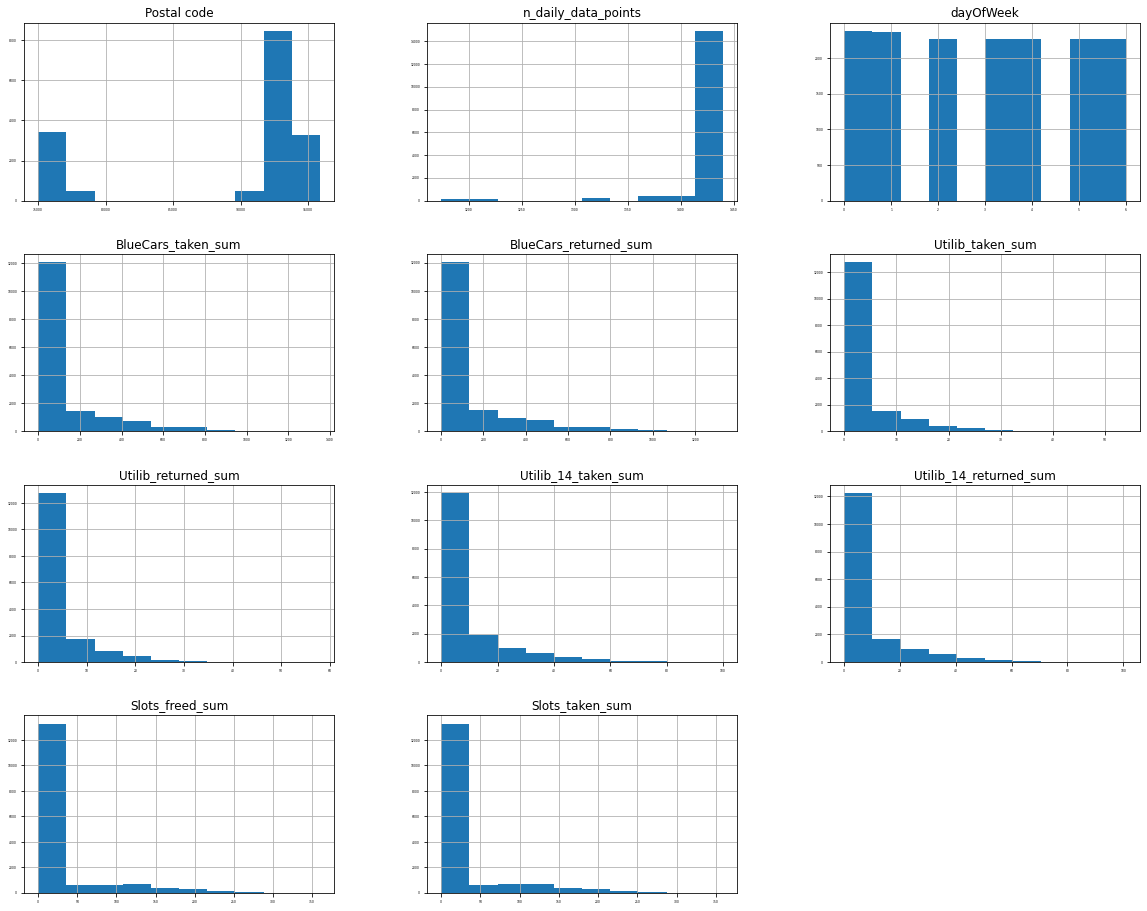

In [ ]:
# plotting histograms 
df.hist(figsize=(20,16), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()



*   Day of the week wa uniformly skewee
*   List item



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


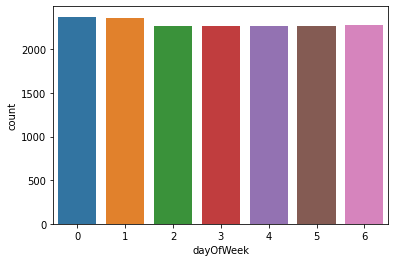

In [ ]:
# ploting the count ie the number of times there was a record made. 
sns.countplot(df['dayOfWeek'])



*   Monday and Tuesday had the highest number of recorded events.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


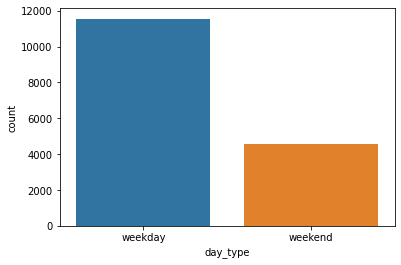

In [ ]:
sns.countplot(df['day_type'])

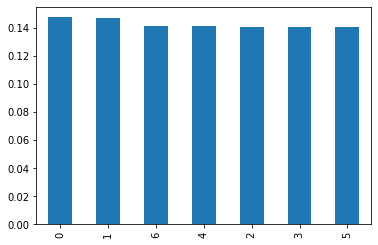

In [ ]:
(df['dayOfWeek'].value_counts().head(10)/len(df)).plot.bar()

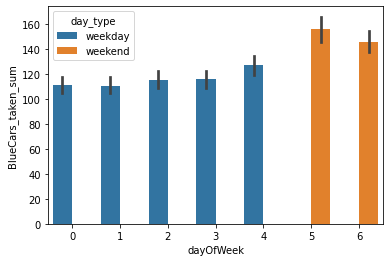

In [ ]:
#Creating subplot for blue cars taken 

sns.barplot(x='dayOfWeek', y='BlueCars_taken_sum', hue ='day_type', data = df)

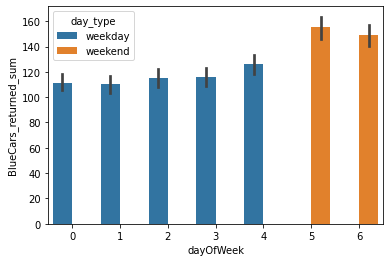

In [ ]:
#Creating subplot for blue cars returned_sum
sns.barplot(x='dayOfWeek', y='BlueCars_returned_sum', hue ='day_type', data = df)

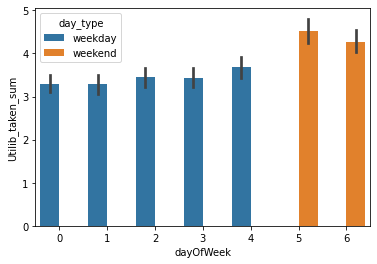

In [ ]:
#Creating subplot for utilib taken sum
sns.barplot(x='dayOfWeek', y='Utilib_taken_sum', hue ='day_type', data = df)

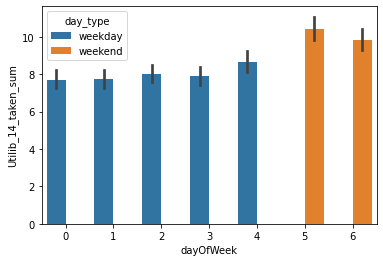

In [ ]:
#Creating subplots utilib 14 taken sum 

sns.barplot(x='dayOfWeek', y='Utilib_14_taken_sum', hue ='day_type', data = df)

**Checking for outliers**

From observation we see that the columns we would like to investigate have heavy tails and that they violate the assumption of normality required to carry out hypothesis testing.

We therefore have to drop all the outliers from the dataset.

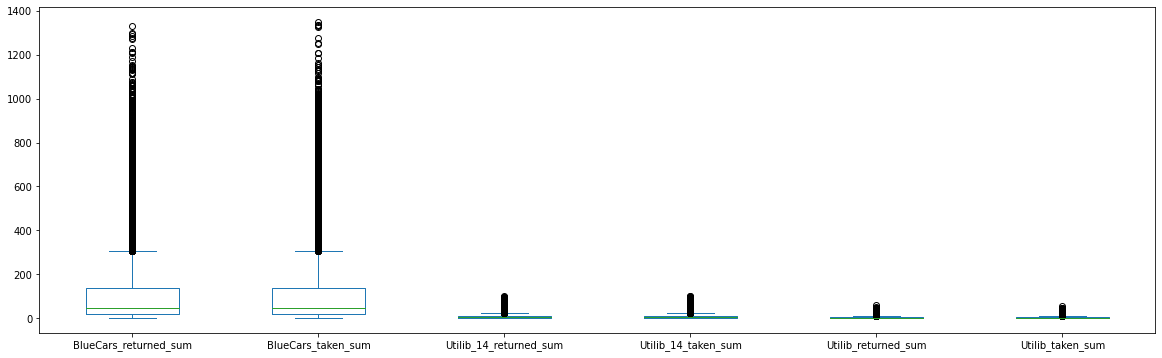

In [ ]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

In [ ]:
Q1 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.25)
Q3 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.75)
IQR = Q3 - Q1
IQR
((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).value_counts()
df = df[~((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).any(axis=1)]

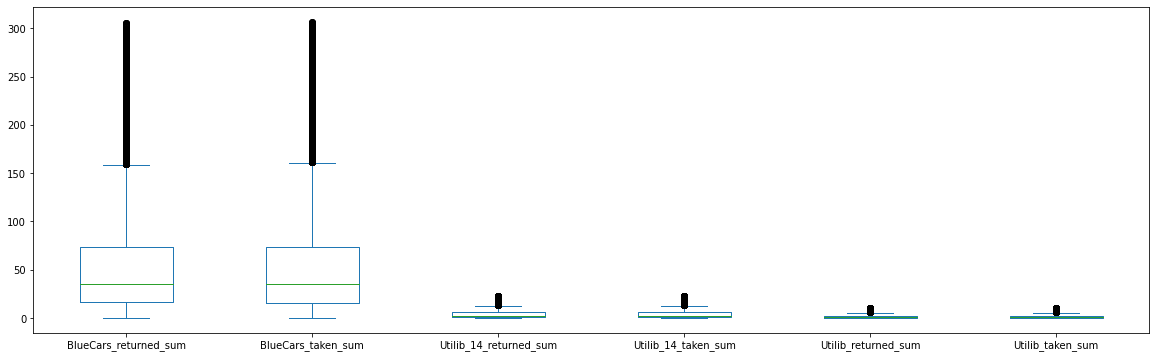

In [ ]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

Text(0.5, 1.0, 'Utilib_14 Returned')

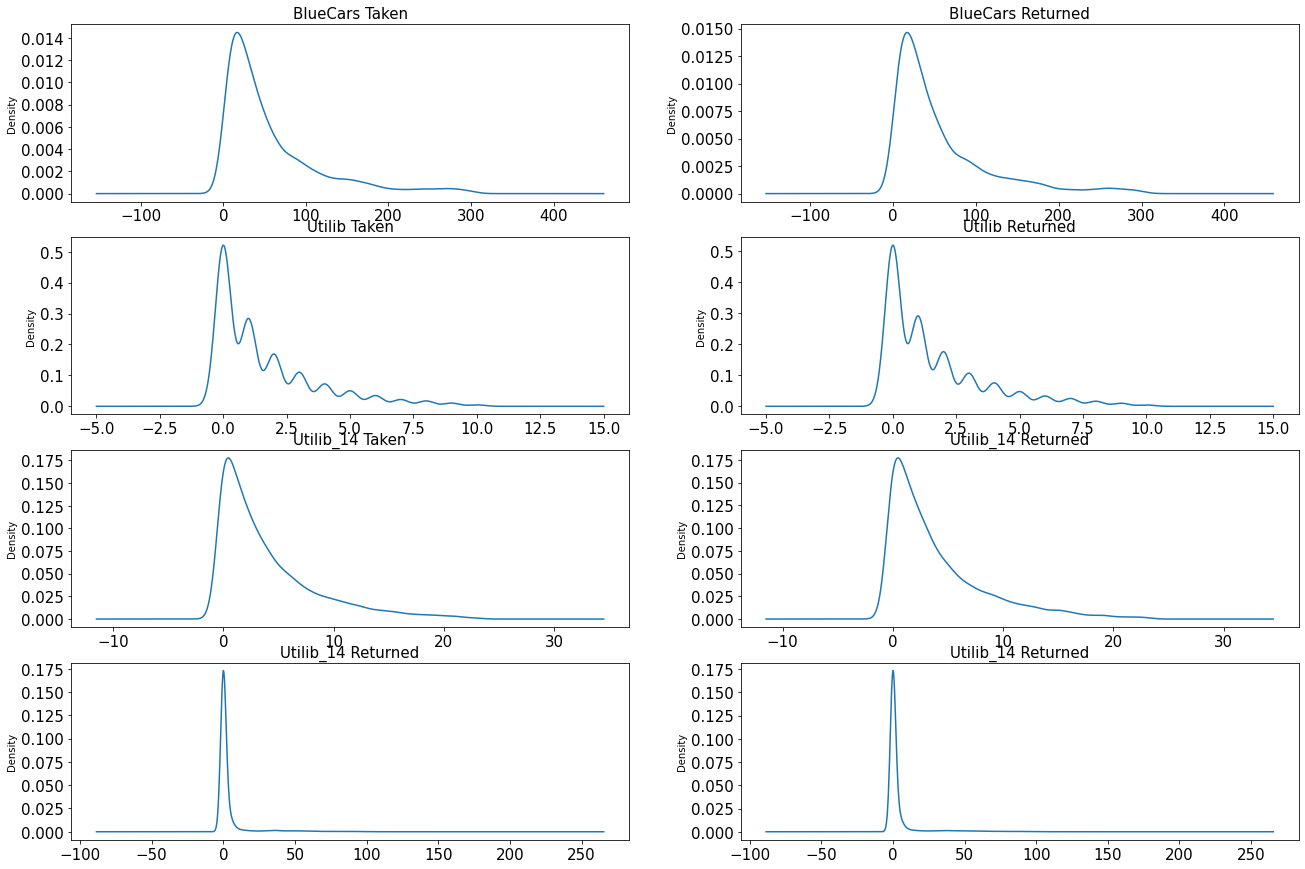

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(22, 15))
df['BlueCars_taken_sum'].plot(kind='density', ax=axarr[0][0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='density',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df['Utilib_taken_sum'].plot( kind='density',ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df['Utilib_returned_sum'].plot( kind='density',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df['Utilib_14_taken_sum'].plot( kind='density',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df['Utilib_14_returned_sum'].plot( kind='density',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_freed_sum'].plot( kind='density',ax=axarr[3][0], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_taken_sum'].plot( kind='density',ax=axarr[3][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 


In [ ]:
df.shape

(13454, 13)

***ii)Bivariate Analysis***

In [ ]:
# plotting the correlation matrix for each numerical column;
x = df.corr()
x

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.015862,0.034299,-0.410374,-0.410238,-0.247674,-0.247382,-0.306404,-0.304771,-0.636389,-0.634930
n_daily_data_points,0.015862,1.000000,0.001637,0.033401,0.032712,0.024812,0.025407,0.030457,0.033816,0.000060,0.001176
dayOfWeek,0.034299,0.001637,1.000000,0.051314,0.047235,0.043614,0.044437,0.042459,0.040456,-0.039220,-0.039908
BlueCars_taken_sum,-0.410374,0.033401,0.051314,1.000000,0.994974,0.676211,0.673482,0.801895,0.798446,0.673480,0.672482
BlueCars_returned_sum,-0.410238,0.032712,0.047235,0.994974,1.000000,0.677810,0.675713,0.803130,0.800434,0.673254,0.673497
Utilib_taken_sum,-0.247674,0.024812,0.043614,0.676211,0.677810,1.000000,0.915538,0.577612,0.568753,0.414005,0.413577
Utilib_returned_sum,-0.247382,0.025407,0.044437,0.673482,0.675713,0.915538,1.000000,0.577244,0.570012,0.413930,0.413946
Utilib_14_taken_sum,-0.306404,0.030457,0.042459,0.801895,0.803130,0.577612,0.577244,1.000000,0.960758,0.517522,0.516461
Utilib_14_returned_sum,-0.304771,0.033816,0.040456,0.798446,0.800434,0.568753,0.570012,0.960758,1.000000,0.514551,0.514302
Slots_freed_sum,-0.636389,0.000060,-0.039220,0.673480,0.673254,0.414005,0.413930,0.517522,0.514551,1.000000,0.998277


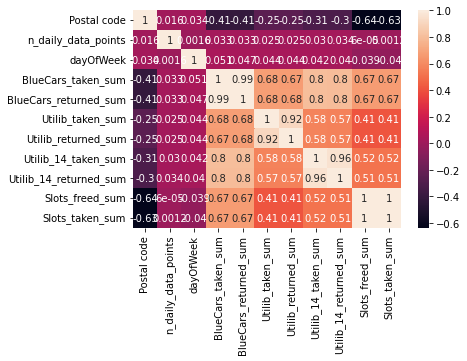

In [ ]:
#here, we use a heatmap to display the results
corelation = df.corr()

sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

-The above results reveal that most of the variables are strong positively correlated, with the highest being the correlation between the slots freed sum and that of the slots taken sum. 

-The postal code has a very tiny correlation with most of the correlations with the the other variables being negative.

 -There is a week correlation between daily data points and day of the week and with that of the other variables.

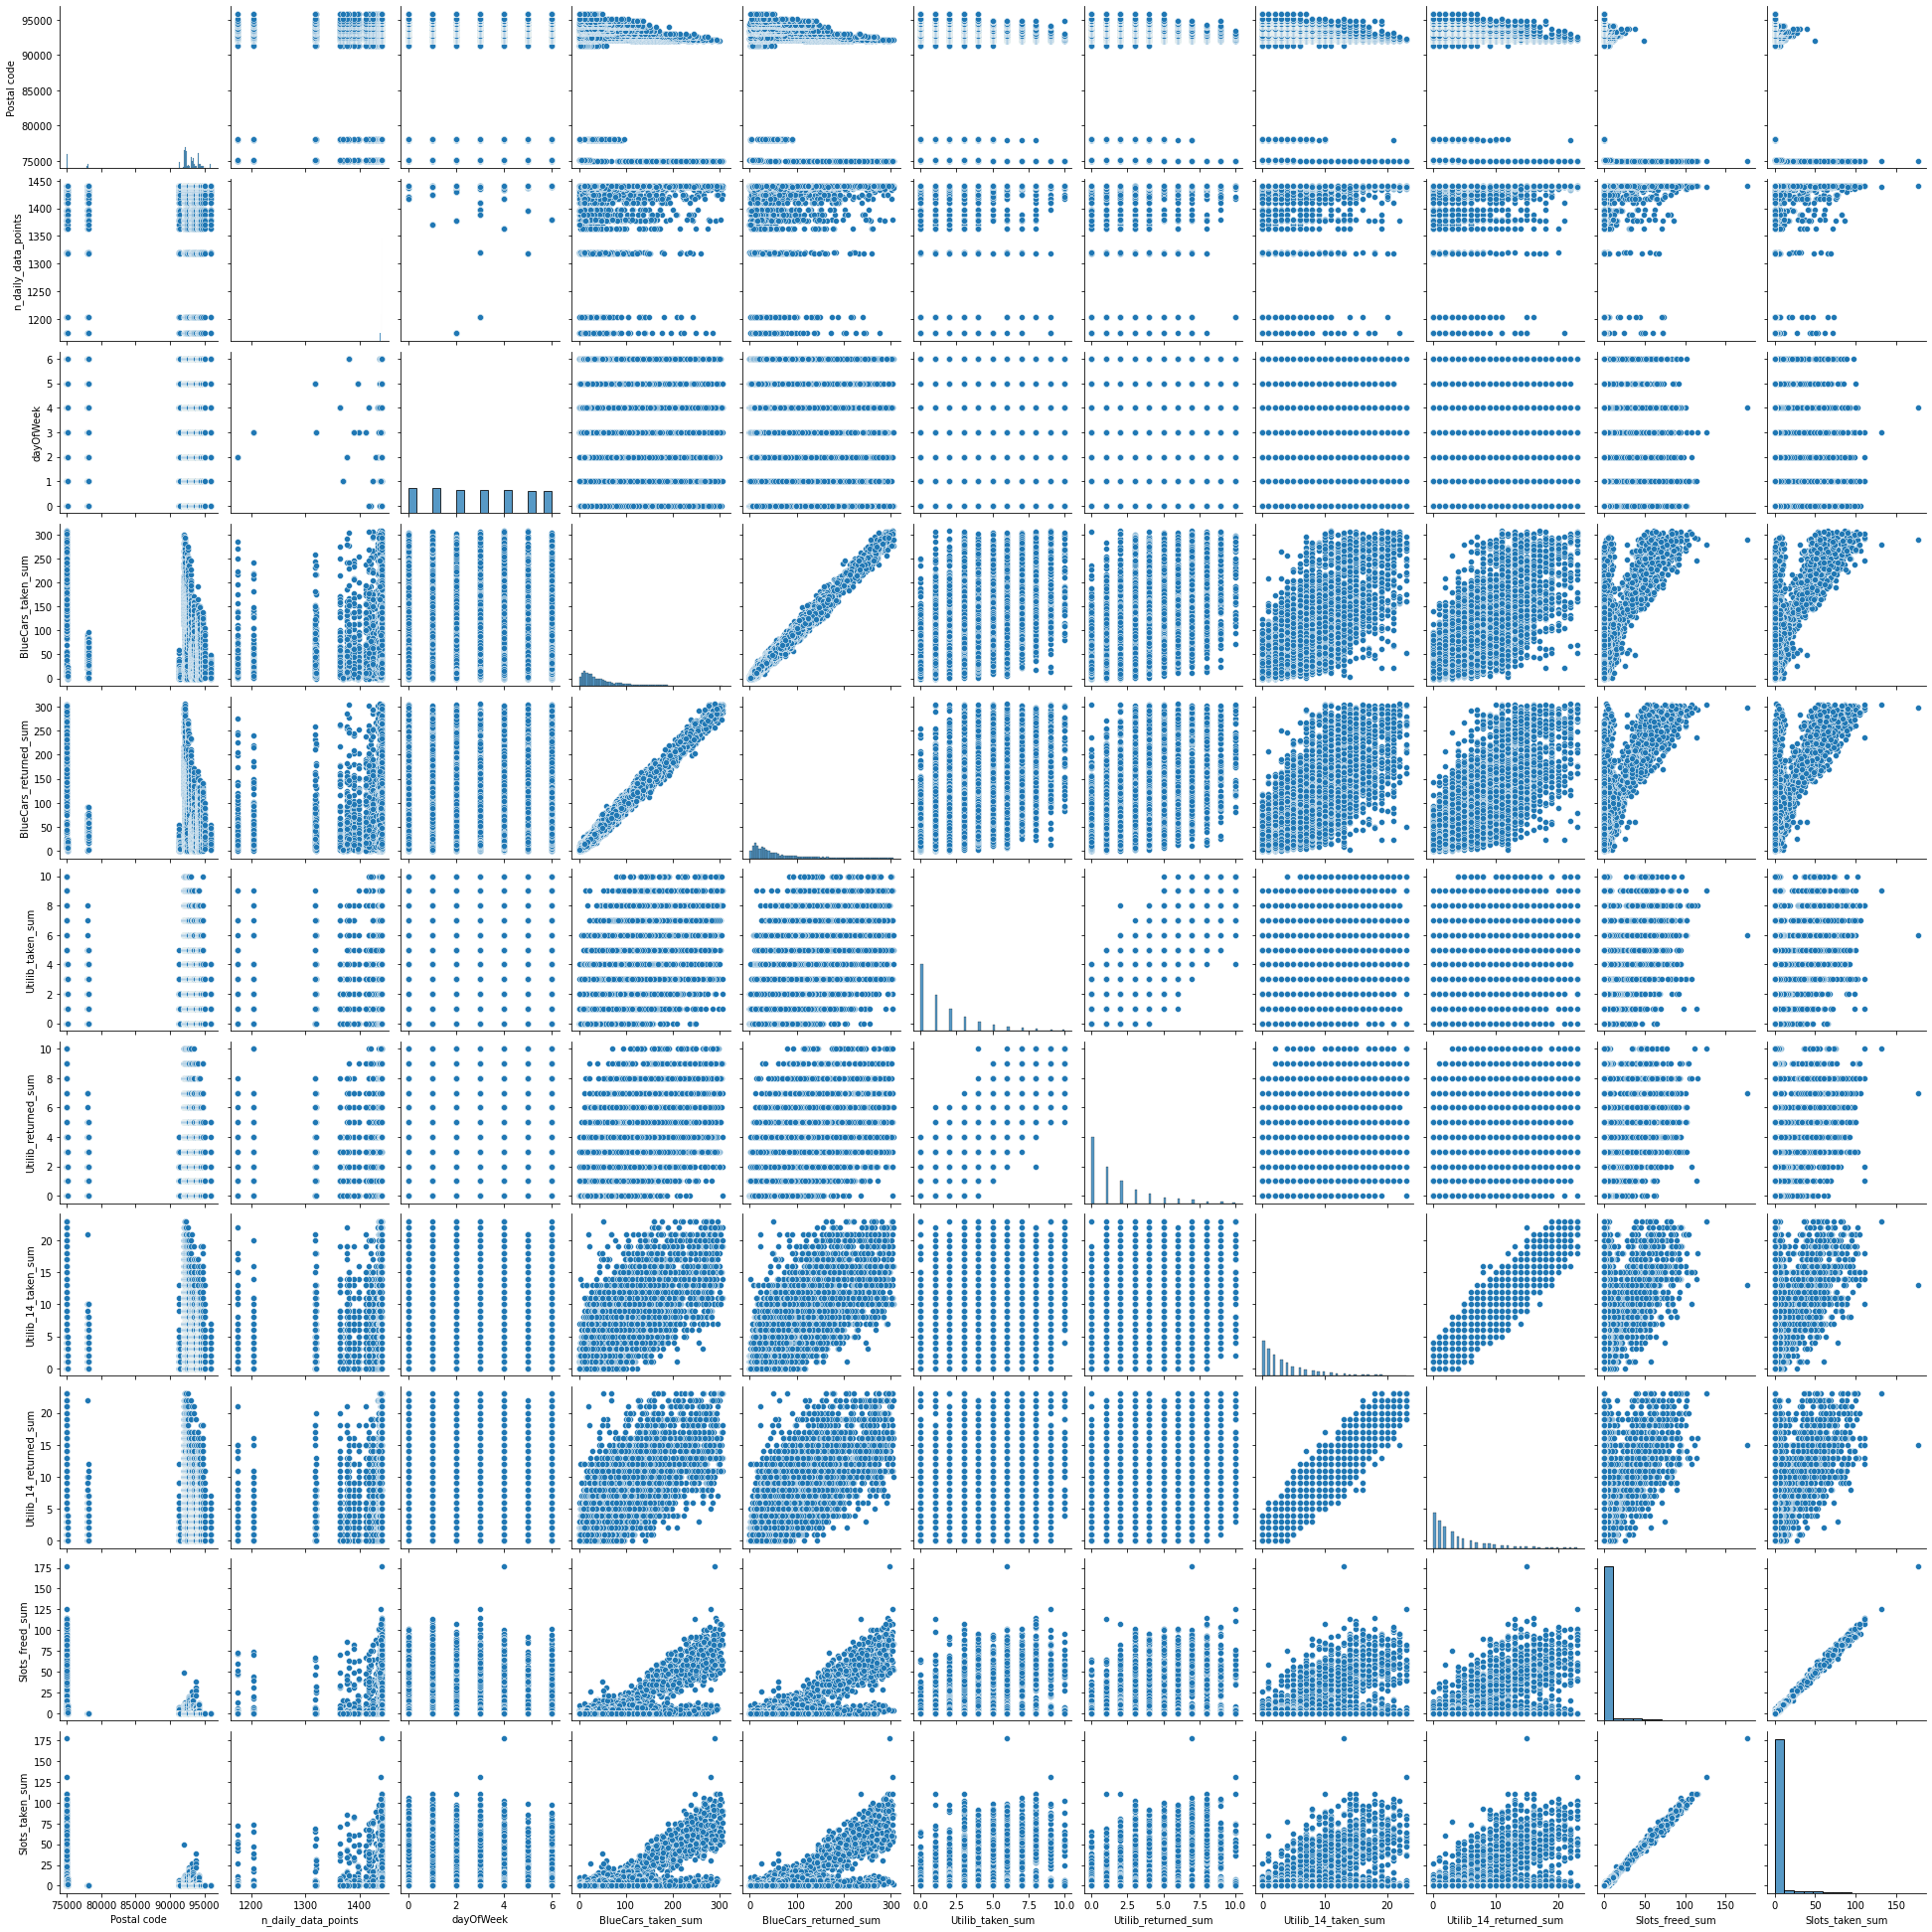

In [ ]:
# Plotting the bivariate summaries 
sns.pairplot(df)
plt.show()

     

*   Most of the variables above show positive correlation


# **4. HYPOTHESIS TESTING**

***a)Getting a sample***

In [ ]:
# crosstab for postal codes for blue cars taken sum
pd.crosstab(df["Postal code"], df.BlueCars_taken_sum.sum()).sample(15)

col_0,761267
Postal code,
92190,156
92210,156
93800,156
93500,156
93360,156
92370,156
75116,155
92350,156
75016,2


In [ ]:
pd.crosstab(df["day_type"], df.day_type.count())

col_0,13454
day_type,
weekday,9787
weekend,3667


In [ ]:
pd.crosstab(df["date"], df.date.count())

col_0,13454
date,
1/1/2018,87
1/10/2018,89
1/11/2018,88
1/12/2018,87
1/13/2018,82
...,...
6/5/2018,87
6/6/2018,85
6/7/2018,87


In [ ]:
pd.crosstab(df['dayOfWeek'], df.day_type.count())

col_0,13454
dayOfWeek,
0,2027
1,2018
2,1914
3,1922
4,1906
5,1820
6,1847


We want to use stratified random sampling and for our strata we take postal code and day of the week.

 We feel like this will be the most inclusive and every region will be touched thus our results are more accurate.

In [ ]:
# generate a sample from the df dataset where we choose a 10% inclusion.
strat_output = df.groupby(['Postal code', 'dayOfWeek'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
# Check the stratified output
print(strat_output['Postal code'].value_counts())
print(strat_output['dayOfWeek'].value_counts())

75001    14
75002    14
93500    14
93440    14
93400    14
         ..
92130     8
75007     8
93390     7
75005     5
75010     4
Name: Postal code, Length: 91, dtype: int64
0    179
1    179
2    177
3    177
4    176
6    172
5    166
Name: dayOfWeek, dtype: int64


We observe that we have relatively achieved our strata goals for the postal code.

 Since the count of days of the week were so close together we ended up with an equal inclusion across our sample.

In [ ]:
# get our sample shape
strat_output.shape

(1226, 13)

We have a sample of size n = 1226. We then get the columns we need.

In [ ]:
# assign variable n to the sample size to be used later on
n = 1226

In [ ]:
# find if there are any missing values
strat_output.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# get the columns we want to work with
strat_new = strat_output[['Postal code', 'dayOfWeek', 'n_daily_data_points', 'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum']]
strat_new

,Postal code,dayOfWeek,n_daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum
140,75001,0,1440,weekday,99,95
126,75001,0,1440,weekday,146,141
1,75001,1,1438,weekday,98,94
117,75001,1,1440,weekday,151,151
2,75001,2,1439,weekday,138,139
...,...,...,...,...,...,...
15940,95880,4,1439,weekday,11,12
15934,95880,5,1437,weekend,19,22
15987,95880,5,1440,weekend,18,21
16009,95880,6,1380,weekend,34,24


In [ ]:
# point estimation of the mean
np.random.seed(6)
# Sample 1000 values
sample_bluecars = np.random.choice(a= strat_new['BlueCars_taken_sum'],
                               size=8000)            

# Show sample mean
print ( sample_bluecars.mean() )                         

# calculate how much the estimated mean differs from the main mean
df['BlueCars_taken_sum'].mean() - sample_bluecars.mean()

58.453875


-1.8709256912442385

***b) Getting our values to use in Hypothesis***

i)POPULATION VALUES

Find the population mean and standard deviation of sum of bluecars taken and returned.

**MEAN**

In [ ]:
# both taken and returned
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean()

BlueCars_taken_sum       56.582949
BlueCars_returned_sum    56.566226
dtype: float64

**STANDARD DEVIATION**

In [ ]:
# both taken and returned
df[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std()

BlueCars_taken_sum       59.241123
BlueCars_returned_sum    59.013290
dtype: float64

We will round off our values to 4 decimal places next.

 Then assign them to variables we will use later on.

In [ ]:
# rounding off mean
pop_mean = round(df['BlueCars_taken_sum'].mean(), 4)
pop_mean

56.5829

In [ ]:
# rounding off standard deviation
pop_std = round(df['BlueCars_taken_sum'].std(), 4)
pop_std

59.2411

ii) SAMPLE VALUES

MEAN

In [ ]:
# both taken and returned
strat_new[['BlueCars_taken_sum', 'BlueCars_returned_sum']].mean()

BlueCars_taken_sum       57.896411
BlueCars_returned_sum    58.021207
dtype: float64

STANDARD DEVIATION

In [ ]:
#both taken and returned
strat_new[['BlueCars_taken_sum', 'BlueCars_returned_sum']].std()

BlueCars_taken_sum       61.196224
BlueCars_returned_sum    61.111871
dtype: float64

Round off the meand and standard deviation to 4 decimal places and assign the values to variables.

In [ ]:
# rounding off sample mean
samp_mean = round(strat_new['BlueCars_taken_sum'].mean(), 4)
samp_mean

57.8964

In [ ]:
# rounding off sample standard deviation
samp_std = round(strat_new['BlueCars_taken_sum'].std(), 4)
samp_std

61.1962

iii) Z-TEST

Formula to find the z score is (sample mean - population mean)/ population standard deviation

We will use an alpha( significance level) of 0.05

In [ ]:
# calculate the z-score
alpha_z = 0.05
zscore = (samp_mean - pop_mean)/ pop_std
zscore

0.0221721068649974

In [ ]:
# find the p-value
prob = round(1 - stats.norm.cdf(zscore), 4)
prob

0.4912

In [ ]:
# interpret via p value
if prob > alpha_z:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


In [ ]:
# confidence interval of 95%
import numpy as np, scipy.stats as st

st.t.interval(0.95, n-1, loc=np.mean(strat_new['BlueCars_taken_sum']), scale=st.sem(strat_new['BlueCars_taken_sum']))

(54.46749551794249, 61.32532666802815)

In [ ]:
# confidence interval of 98%
import numpy as np, scipy.stats as st

st.t.interval(0.98, n-1, loc=np.mean(strat_new['BlueCars_taken_sum']), scale=st.sem(strat_new['BlueCars_taken_sum']))

(53.82520878086015, 61.967613405110484)

iv) T-TEST

Formula to find the t-statistic is (sample mean - population mean)/ (sample standard deviation/ squareroot of n) where n is sample size.

We will use a alpha(significance level) of 0.05

In [ ]:
# calculate the t-statistic
t = (samp_mean - pop_mean)/ (samp_std/m.sqrt(n))
t

0.7515378480662261

In [ ]:
# degrees of freedom
df = n - 1

# where the significance level is 0.05 but it's a two tailed test so we divide our alpha into 2 for the left and right tail.
# get the t-critical value
alpha = 0.05
alpha_t = alpha/2

# ppf is percent point function
t_critical_value = stats.t.ppf(q=alpha_t, df=df)
t_critical_value

-1.9619024147562634

In [ ]:
# find the t-statistic and the two-tailed p value
t_statistic, two_tailed_p_value = stats.ttest_1samp(a=strat_new['BlueCars_taken_sum'], popmean=pop_mean)
t_statistic

0.751543900320392

In [ ]:
# find the p value 
one_tail_p_value = round(two_tailed_p_value*2, 5)
one_tail_p_value

0.90494

In [ ]:
# interpret via p value
prob = one_tail_p_value
if prob > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


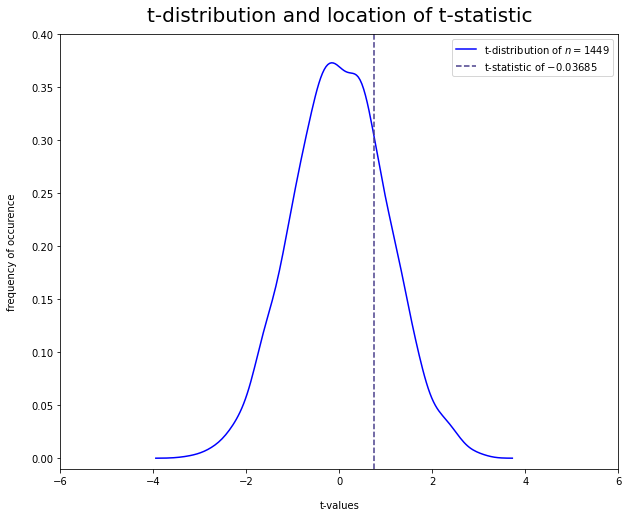

In [ ]:
# visualization of t-distribution and t-statistic 
plt.figure(figsize=(10, 8))
np.random.seed(5)
t_distribution_df_28 = np.random.standard_t(n, size=3000)
sns.distplot(t_distribution_df_28, color='blue', hist=False, label='t-distribution of $n=1449$')
plt.axvline(x=t_statistic, color='darkslateblue', linestyle='--', label='t-statistic of $-0.03685$')
plt.xlabel("t-values", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);
plt.title("t-distribution and location of t-statistic", y=1.015, fontsize=20)
plt.ylim(-.01, .4)
plt.xlim(-6, 6)
plt.legend();

# **5. INTERPRETATION AND CONCLUSIONS**

**Z-test**

The p value of 0.90494 is greater than the initial alpha level of 0.05. 

This p-value tells us the probability of getting this z-score if the null hypothesis is true. 

Therefore, there is sufficient evidence to accept the null hypothesis. That the population mean is equal to 56.5829.



**T-test**

Ths t-statistic of 0.7515378 is greater than the t-critical value of -1.961902.

 Also, the p-value of 0.90494 is greater than the initial alpha level of 0.05. 

This p-value tells us the probability of getting this t-statistic if the null hypothesis is true.

Therefore, there is sufficient evidence to accept the null hypothesis.That the population mean is equal to 56.5829.

It is clear that from both our hypothesis tests that they yeild similar results to allow us to accept the null hypothesis.

A detailed hypothesis report can be found here https://docs.google.com/document/d/1vJtPYHMlXNqGxs82q8K2w8MkezOJ0UPsxWnntpAH9Do/edit#